### Create SparkSession
In order to create SparkSession programmatically( in .py file) in PySpark, you need to use the builder pattern method builder() as explained below. getOrCreate() method returns an already existing SparkSession; if not exists, it creates a new SparkSession.

master() – If you are running it on the cluster you need to use your master name as an argument to master(). usually, it would be either yarn or mesos depends on your cluster setup.

Use local[x] when running in Standalone mode. x should be an integer value and should be greater than 0; this represents how many partitions it should create when using RDD, DataFrame, and Dataset. Ideally, x value should be the number of CPU cores you have.
appName() – Used to set your application name.

getOrCreate() – This returns a SparkSession object if already exists, creates new one if not exists.

In [1]:
import findspark
findspark.init("C:\spark\spark-2.4.8-bin-hadoop2.7") 

import pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('spark_basic') \
                    .getOrCreate()

In [2]:
spark

### PySpark RDD – Resilient Distributed Dataset
In this section of the PySpark tutorial, I will introduce the RDD and explains how to create them and use its transformation and action operations with examples. Here is the full article on PySpark RDD in case if you wanted to learn more of and get your fundamentals strong.

PySpark RDD (Resilient Distributed Dataset) is a fundamental data structure of PySpark that is fault-tolerant, immutable distributed collections of objects, which means once you create an RDD you cannot change it. Each dataset in RDD is divided into logical partitions, which can be computed on different nodes of the cluster.

RDD Creation 
In order to create an RDD, first, you need to create a SparkSession which is an entry point to the PySpark application. SparkSession can be created using a builder() or newSession() methods of the SparkSession.

Spark session internally creates a sparkContext variable of SparkContext. You can create multiple SparkSession objects but only one SparkContext per JVM. In case if you want to create another new SparkContext you should stop existing Sparkcontext (using stop()) before creating a new one

#### using parallelize()
SparkContext has several functions to use with RDDs. For example, it’s parallelize() method is used to create an RDD from a list.



In [3]:
dataList = [("sales_1", 20000), ("sales_2", 100000), ("sales_3", 3000)]
rdd=spark.sparkContext.parallelize(dataList)

In [4]:
type(dataList),type(rdd)

(list, pyspark.rdd.RDD)

**RDD Transformations**    
Transformations on Spark RDD returns another RDD and transformations are lazy meaning they don’t execute until you call an action on RDD. Some transformations on RDD’s are flatMap(), map(), reduceByKey(), filter(), sortByKey() and return new RDD instead of updating the current.

**RDD Actions**    
RDD Action operation returns the values from an RDD to a driver node. In other words, any RDD function that returns non RDD[T] is considered as an action. 

Some actions on RDD’s are count(), collect(), first(), max(), reduce() and more.

In [5]:
rdd.

3

#### using textFile()    
RDD can also be created from a text file using textFile() function of the SparkContext.

In [ ]:
rdd2 = spark.sparkContext.textFile("sample.txt")

In [ ]:
rdd2.count()

In [ ]:
rdd2.collect()

#### PySpark DataFrame

PySpark DataFrame is mostly similar to Pandas DataFrame with exception PySpark DataFrames are distributed in the cluster (meaning the data in DataFrame’s are stored in different machines in a cluster) and any operations in PySpark executes in parallel on all machines whereas Panda Dataframe stores and operates on a single machine.

### using createDataFrame()

In [3]:
data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)

In [4]:
df.printSchema()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



#### shows the 20 elements from the DataFrame.

In [5]:
df.show()

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



In [6]:
df.summary().show()

+-------+---------+----------+--------+----------+------+------------------+
|summary|firstname|middlename|lastname|       dob|gender|            salary|
+-------+---------+----------+--------+----------+------+------------------+
|  count|        5|         5|       5|         5|     5|                 5|
|   mean|     null|      null|    null|      null|  null|            2999.8|
| stddev|     null|      null|    null|      null|  null|1732.4838238783068|
|    min|    James|          |        |1967-12-01|     F|                -1|
|    25%|     null|      null|    null|      null|  null|              3000|
|    50%|     null|      null|    null|      null|  null|              4000|
|    75%|     null|      null|    null|      null|  null|              4000|
|    max|   Robert|      Rose|Williams|2000-05-19|     M|              4000|
+-------+---------+----------+--------+----------+------+------------------+



#### Lets read the csv file now using spark.read.csv.

In [3]:
datadf = spark.read.csv('adult_data.csv',header=True)

In [8]:
df.show(5)

+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|  x|age|workclass|fnlwgt|   education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|  1| 25|  Private|226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
|  2| 38|  Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
|  3| 28|Local-gov|336951|  Assoc-acdm|             12|Married-civ-spouse|  Protective-ser

In [12]:
num_rows = datadf.count()
print("number of rows: ", num_rows)

number of rows:  48842


#### show our dataFrame schema

In [13]:
datadf.printSchema()

root
 |-- x: string (nullable = true)
 |-- age: string (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: string (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: string (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: string (nullable = true)
 |-- capital-loss: string (nullable = true)
 |-- hours-per-week: string (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



#### Pyspark data stats

In [14]:
datadf.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             48842|
|   mean| 38.64358543876172|
| stddev|13.710509934443472|
|    min|                17|
|    max|                90|
+-------+------------------+



In [16]:
datadf.describe('workclass').show()

+-------+-----------+
|summary|  workclass|
+-------+-----------+
|  count|      48842|
|   mean|       null|
| stddev|       null|
|    min|          ?|
|    max|Without-pay|
+-------+-----------+



In [17]:
datadf.dtypes

[('x', 'string'),
 ('age', 'string'),
 ('workclass', 'string'),
 ('fnlwgt', 'string'),
 ('education', 'string'),
 ('educational-num', 'string'),
 ('marital-status', 'string'),
 ('occupation', 'string'),
 ('relationship', 'string'),
 ('race', 'string'),
 ('gender', 'string'),
 ('capital-gain', 'string'),
 ('capital-loss', 'string'),
 ('hours-per-week', 'string'),
 ('native-country', 'string'),
 ('income', 'string')]

In [4]:
null_values=datadf.filter(datadf.workclass=="?")
null_values.show(5)

+---+---+---------+------+------------+---------------+------------------+----------+-------------+-----+------+------------+------------+--------------+--------------+------+
|  x|age|workclass|fnlwgt|   education|educational-num|    marital-status|occupation| relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---+---------+------+------------+---------------+------------------+----------+-------------+-----+------+------------+------------+--------------+--------------+------+
|  5| 18|        ?|103497|Some-college|             10|     Never-married|         ?|    Own-child|White|Female|           0|           0|            30| United-States| <=50K|
|  7| 29|        ?|227026|     HS-grad|              9|     Never-married|         ?|    Unmarried|Black|  Male|           0|           0|            40| United-States| <=50K|
| 14| 58|        ?|299831|     HS-grad|              9|Married-civ-spouse|         ?|      Husband|White|  Male|        

In [ ]:
null_values_1=datadf.filter(datadf.workclass=="?")
null_values_1.show(5)

In [19]:
null_values.count()

2799

In [5]:
datadf.withColumn('age',datadf.age+100).show(5)

+---+-----+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|  x|  age|workclass|fnlwgt|   education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+-----+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|  1|125.0|  Private|226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
|  2|138.0|  Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
|  3|128.0|Local-gov|336951|  Assoc-acdm|             12|Married-civ-spouse|  Pr

In [6]:
from pyspark.sql.functions import when
import numpy as np
df2=datadf.withColumn('workclass',when(datadf["workclass"] == '?', np.NaN).otherwise(datadf["workclass"]))

In [ ]:
df2.show()

In [7]:
df2_exp=datadf.withColumn('workclass',when(datadf["workclass"] == '?', 'Private').otherwise(datadf["workclass"]))
df2_exp.show(5)

+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|  x|age|workclass|fnlwgt|   education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|  1| 25|  Private|226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
|  2| 38|  Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
|  3| 28|Local-gov|336951|  Assoc-acdm|             12|Married-civ-spouse|  Protective-ser

In [ ]:
type(np.array(df2))

In [ ]:
df2.show()

In [8]:
df2.na.fill('Private').show(5)

+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|  x|age|workclass|fnlwgt|   education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|  1| 25|  Private|226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
|  2| 38|  Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
|  3| 28|Local-gov|336951|  Assoc-acdm|             12|Married-civ-spouse|  Protective-ser

### Data preprocessing    

Data processing is a critical step in machine learning. After you remove garbage data, you get some important insights.

For instance, you know that age is not a linear function with the income. When people are young, their income is usually lower than mid-age. After retirement, a household uses their saving, meaning a decrease in income. To capture this pattern, you can add a square to the age feature

Add age square

To add a new feature, you need to:

Select the column
Apply the transformation and add it to the DataFrame

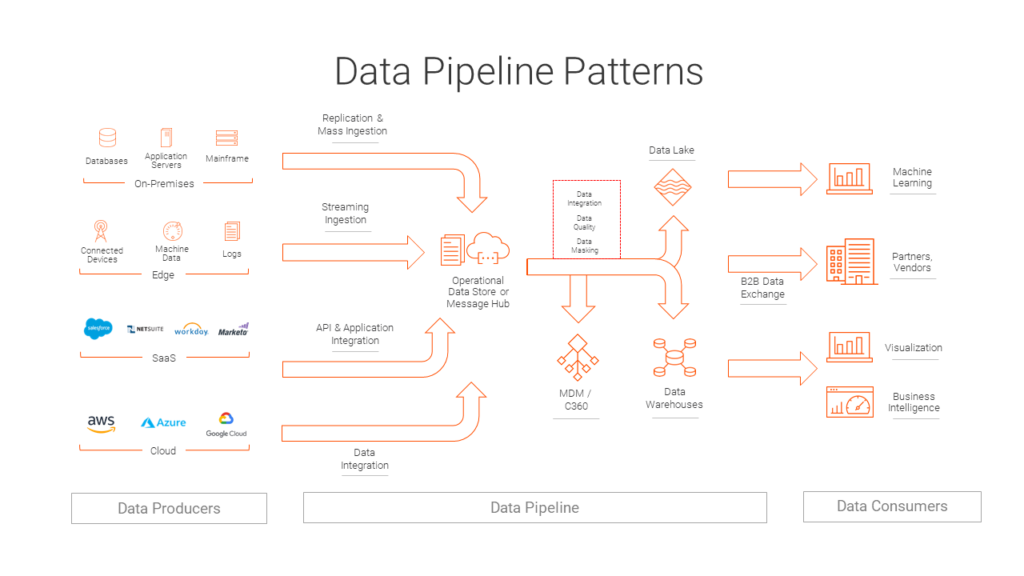

In [40]:
from pyspark.sql.functions import *

In [ ]:
df = df2_exp.withColumn("age_square", col("age")**2)

In [ ]:
df.show()

You can see that age_square has been successfully added to the data frame. You can change the order of the variables with select. Below, you bring age_square right after age.

In [ ]:
df.columns

In [ ]:
from pyspark.sql.functions import col

data = df.select(col("`marital.status`").alias("marital"),)
data.show()

In [ ]:
df.select('`marital.status`','age').show()

In [ ]:
df.drop('age_square').show(5)

In [ ]:
df.na.drop()

In [ ]:
df.crossJoin(df.select('`marital.status`')).select('age').show(5)

In [ ]:
emp_details=[(1,'kiran',24,10000),(2,'jay',28,15000),(3,'matt',22,30000)]
dept_ID=[(1,'A'),(1,'B'),(2,'A')]

In [ ]:
emp_df=spark.createDataFrame(data=emp_details,schema=['Dept_id','Name','Age','Salary'])

In [ ]:
dept_df=spark.createDataFrame(data=dept_ID,schema=['dept_id','dept_name'])

In [ ]:
emp_df.join(dept_df,on='dept_id',how='inner')

In [ ]:
emp_df.join(dept_df,emp_df.Dept_id==dept_df.dept_id,how='outer').select(emp_df.Dept_id,emp_df.Name,dept_df.dept_name).show(truncate=False)

In [ ]:
emp_df.union(emp_df).show(truncate=False)

In [ ]:
dept_df.unionAll(dept_df).show(truncate=False)

## Analytics

#### Descriptive Analytics

1. Summary Statistics 
2. Groupby 
3. Crosstab
4. pivot table

#### Predicitive Analytics

1. Statistical Modelling
2. Machine Learning


### Crosstab computation
In some occasion, it can be interesting to see the descriptive statistics between two pairwise columns. For instance, you can count the number of people with income below or above 50k by education level. This operation is called a crosstab.

In [10]:
df.columns

['x',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [15]:
df[['income']].describe().show()

+-------+------+
|summary|income|
+-------+------+
|  count| 48842|
|   mean|  null|
| stddev|  null|
|    min| <=50K|
|    max|  >50K|
+-------+------+



In [16]:
for x in df.columns:
    df[[x]].describe().show()

+-------+------------------+
|summary|                 x|
+-------+------------------+
|  count|             48842|
|   mean|           24421.5|
| stddev|14099.615260708357|
|    min|                 1|
|    max|              9999|
+-------+------------------+

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             48842|
|   mean| 38.64358543876172|
| stddev|13.710509934443472|
|    min|                17|
|    max|                90|
+-------+------------------+

+-------+-----------+
|summary|  workclass|
+-------+-----------+
|  count|      48842|
|   mean|       null|
| stddev|       null|
|    min|          ?|
|    max|Without-pay|
+-------+-----------+

+-------+------------------+
|summary|            fnlwgt|
+-------+------------------+
|  count|             48842|
|   mean|189664.13459727284|
| stddev| 105604.0254231574|
|    min|            100009|
|    max|             99987|
+-------+------------------+

+-------+------

In [17]:
df.groupBy("education").count().sort("count",ascending=True).show()

+------------+-----+
|   education|count|
+------------+-----+
|   Preschool|   83|
|     1st-4th|  247|
|     5th-6th|  509|
|   Doctorate|  594|
|        12th|  657|
|         9th|  756|
| Prof-school|  834|
|     7th-8th|  955|
|        10th| 1389|
|  Assoc-acdm| 1601|
|        11th| 1812|
|   Assoc-voc| 2061|
|     Masters| 2657|
|   Bachelors| 8025|
|Some-college|10878|
|     HS-grad|15784|
+------------+-----+



In [20]:
df.groupBy("educational-num").count().sort("count",ascending=True).show()

+---------------+-----+
|educational-num|count|
+---------------+-----+
|              1|   83|
|              2|  247|
|              3|  509|
|             16|  594|
|              8|  657|
|              5|  756|
|             15|  834|
|              4|  955|
|              6| 1389|
|             12| 1601|
|              7| 1812|
|             11| 2061|
|             14| 2657|
|             13| 8025|
|             10|10878|
|              9|15784|
+---------------+-----+



In [21]:
df.groupBy('marital-status').agg({'capital-gain':'mean'}).show()

+--------------------+------------------+
|      marital-status| avg(capital-gain)|
+--------------------+------------------+
|           Separated| 581.8424836601307|
|       Never-married|  384.382639449029|
|Married-spouse-ab...| 629.0047770700637|
|            Divorced| 793.6755615860094|
|             Widowed| 603.6442687747035|
|   Married-AF-spouse|2971.6216216216217|
|  Married-civ-spouse|1739.7006121810625|
+--------------------+------------------+



In [22]:
df.groupBy('workclass').agg({'capital-gain':'mean'}).show()

+----------------+------------------+
|       workclass| avg(capital-gain)|
+----------------+------------------+
|Self-emp-not-inc|1781.7446918694977|
|       Local-gov| 798.2286352040817|
|       State-gov| 756.3361938414942|
|         Private| 896.1353742700408|
|     Without-pay|325.23809523809524|
|     Federal-gov| 923.2877094972067|
|    Never-worked|               0.0|
|               ?|502.94605216148625|
|    Self-emp-inc| 5132.794100294986|
+----------------+------------------+



In [25]:
df.groupBy(['relationship','gender']).agg({'capital-gain':'mean'}).show()

+--------------+------+------------------+
|  relationship|gender| avg(capital-gain)|
+--------------+------+------------------+
|       Husband|Female|               0.0|
|          Wife|Female|1660.9175257731958|
|Other-relative|Female|207.42235123367198|
|     Own-child|  Male|174.96504161712247|
|     Own-child|Female|173.65462085308056|
|       Husband|  Male|1774.5898047172204|
|Other-relative|  Male| 258.2374541003672|
|     Unmarried|Female|  349.632382892057|
| Not-in-family|Female| 585.0044293015333|
|          Wife|  Male|               0.0|
| Not-in-family|  Male| 957.9374348279458|
|     Unmarried|  Male| 783.0584795321637|
+--------------+------+------------------+



In [32]:
df.groupBy(['native-country','gender']).count().show(50)

+------------------+------+-----+
|    native-country|gender|count|
+------------------+------+-----+
|          Thailand|Female|   14|
|             South|Female|   44|
|          Honduras|  Male|    9|
|             Japan|  Male|   61|
|Dominican-Republic|  Male|   55|
|          Honduras|Female|   11|
|       Philippines|Female|  115|
|       Puerto-Rico|Female|   75|
|              Laos|Female|    9|
|                 ?|Female|  248|
|           Germany|Female|   87|
|           Vietnam|Female|   30|
|            Poland|  Male|   63|
|           Ireland|  Male|   28|
|       El-Salvador|  Male|  101|
|           Jamaica|  Male|   48|
|              Peru|  Male|   28|
|             Italy|Female|   28|
|            France|  Male|   24|
|            Greece|  Male|   40|
|            Canada|Female|   63|
|              Iran|Female|   12|
|             Haiti|  Male|   44|
|              Cuba|Female|   50|
|          Scotland|Female|    8|
|           Vietnam|  Male|   56|
|           En

AttributeError: 'NoneType' object has no attribute 'sort'

In [42]:
df.groupby('native-country').agg({'native-country': 'count'}).sort(asc("count(native-country)")).show(50)

+--------------------+---------------------+
|      native-country|count(native-country)|
+--------------------+---------------------+
|  Holand-Netherlands|                    1|
|             Hungary|                   19|
|            Honduras|                   20|
|            Scotland|                   21|
|          Yugoslavia|                   23|
|Outlying-US(Guam-...|                   23|
|                Laos|                   23|
|     Trinadad&Tobago|                   27|
|            Cambodia|                   28|
|                Hong|                   30|
|            Thailand|                   30|
|             Ireland|                   37|
|              France|                   38|
|             Ecuador|                   45|
|                Peru|                   46|
|              Greece|                   49|
|           Nicaragua|                   49|
|                Iran|                   59|
|              Taiwan|                   65|
|         

In [44]:
df.crosstab('education', 'income').show()

+----------------+-----+----+
|education_income|<=50K|>50K|
+----------------+-----+----+
|    Some-college| 8815|2063|
|            10th| 1302|  87|
|         1st-4th|  239|   8|
|       Assoc-voc| 1539| 522|
|       Preschool|   82|   1|
|             9th|  715|  41|
|         HS-grad|13281|2503|
|         5th-6th|  482|  27|
|         7th-8th|  893|  62|
|            11th| 1720|  92|
|         Masters| 1198|1459|
|     Prof-school|  217| 617|
|            12th|  609|  48|
|       Doctorate|  163| 431|
|       Bachelors| 4712|3313|
|      Assoc-acdm| 1188| 413|
+----------------+-----+----+



In [45]:
df.groupBy(['native-country']).pivot('gender').count().show()

+------------------+------+----+
|    native-country|Female|Male|
+------------------+------+----+
|       Philippines|   115| 180|
|           Germany|    87| 119|
|          Cambodia|     6|  22|
|            France|    14|  24|
|            Greece|     9|  40|
|            Taiwan|    19|  46|
|           Ecuador|    16|  29|
|         Nicaragua|    22|  27|
|              Hong|    11|  19|
|              Peru|    18|  28|
|             India|    18| 133|
|             China|    33|  89|
|             Italy|    28|  77|
|Holand-Netherlands|     1|null|
|              Cuba|    50|  88|
|             South|    44|  71|
|              Iran|    12|  47|
|           Ireland|     9|  28|
|          Thailand|    14|  16|
|              Laos|     9|  14|
+------------------+------+----+
only showing top 20 rows



In [47]:
df.groupBy(['native-country','income']).pivot('gender').count().show(50)

+--------------------+------+------+-----+
|      native-country|income|Female| Male|
+--------------------+------+------+-----+
|          Yugoslavia|  >50K|     1|    7|
|              Poland|  >50K|     2|   15|
|            Columbia| <=50K|    32|   49|
|              Poland| <=50K|    22|   48|
|                Iran|  >50K|     2|   20|
|               Haiti|  >50K|     1|    8|
|            Thailand| <=50K|    13|   12|
|       United-States|  >50K|  1613| 9081|
|               Haiti| <=50K|    30|   36|
|           Nicaragua|  >50K|     1|    2|
|            Portugal| <=50K|    12|   43|
|               Italy| <=50K|    23|   48|
|                Laos|  >50K|     1|    1|
|                Iran| <=50K|    10|   27|
|             Jamaica| <=50K|    55|   36|
|              Mexico| <=50K|   212|  692|
|           Guatemala|  >50K|  null|    3|
|              Canada|  >50K|    15|   48|
|              Greece| <=50K|     6|   25|
|              Taiwan|  >50K|     4|   22|
|          

In [48]:
df.columns

['x',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [51]:
df[['capital-gain']].dtypes

[('capital-gain', 'string')]

In [59]:
(df[['capital-gain']] == '?')

False

In [69]:
df1=df.withColumnRenamed('capital-gain','capitalgain').withColumnRenamed('hours-per-week','hoursperweek')
                                        

In [70]:
df1.show()

+---+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+-----------+------------+------------+--------------+------+
|  x|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|capitalgain|capital-loss|hoursperweek|native-country|income|
+---+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+-----------+------------+------------+--------------+------+
|  1| 25|         Private|226802|        11th|              7|     Never-married|Machine-op-inspct|    Own-child|             Black|  Male|          0|           0|          40| United-States| <=50K|
|  2| 38|         Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|      Husband|             White|  Male|          0|           0|          50| United-States| <=50K|


In [73]:
df1=df1.withColumn('capitalgain',df1.capitalgain.cast('int'))

In [74]:
df1.show()

+---+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+-----------+------------+------------+--------------+------+
|  x|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|capitalgain|capital-loss|hoursperweek|native-country|income|
+---+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+-----------+------------+------------+--------------+------+
|  1| 25|         Private|226802|        11th|              7|     Never-married|Machine-op-inspct|    Own-child|             Black|  Male|          0|           0|          40| United-States| <=50K|
|  2| 38|         Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|      Husband|             White|  Male|          0|           0|          50| United-States| <=50K|


In [78]:
df1.groupBy(['native-country']).pivot('gender').mean('capitalgain').show(50)

+--------------------+------------------+------------------+
|      native-country|            Female|              Male|
+--------------------+------------------+------------------+
|         Philippines|136.47826086956522|            2385.6|
|             Germany|239.77011494252875|1663.2268907563025|
|            Cambodia| 751.3333333333334| 682.7727272727273|
|              France| 957.2142857142857|           102.625|
|              Greece| 1168.888888888889|          1123.025|
|              Taiwan|115.89473684210526| 2705.586956521739|
|             Ecuador|           128.875| 438.3103448275862|
|           Nicaragua| 308.8181818181818|               0.0|
|                Hong|               0.0| 790.7368421052631|
|                Peru|101.72222222222223|               0.0|
|               India| 537.1666666666666| 3556.285714285714|
|               China|               0.0|1929.7078651685392|
|               Italy| 78.64285714285714|1059.4415584415585|
|  Holand-Netherlands|  

In [ ]:
df.groupBy(['native-country',]).pivot('capital-gain').sum().show()

### Exclude Holand-Netherlands

When a group within a feature has only one observation, it brings no information to the model. On the contrary, it can lead to an error during the cross-validation.

Let's check the origin of the household

In [ ]:
df.filter('native.country == Holand-Netherlands').count()
df.groupby('native.country').agg({'native.country': 'count'}).sort(asc("count(native.country)")).show()